# EXERCISE 2

Design an X-bar and R control chart for the data in `ESE06_ex2.csv`. Which conclusions can be drawn about the process?

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE06_ex2.csv')

# Inspect the dataset
data.head()

,x1,x2,x3,x4,x5
0,0.473,0.405,0.213,3.187,0.572
1,0.430,2.623,1.415,0.915,2.933
2,0.148,1.938,1.057,2.019,1.256
3,5.209,0.211,1.047,0.492,0.388
4,0.308,0.536,0.570,2.951,1.741


> ### Solution
>
> Inspect the data by plotting the individual datapoints. 

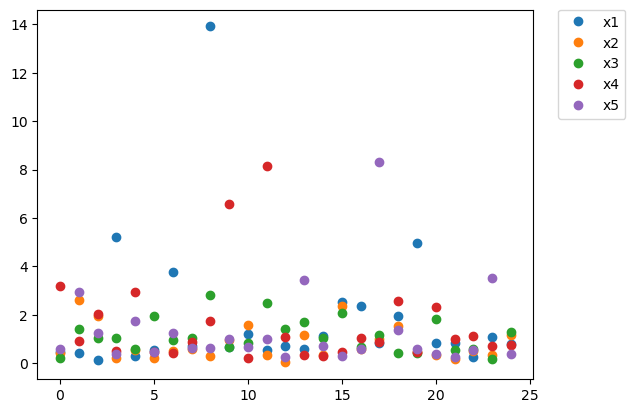

In [2]:
# Make a scatter plot of all the columns against the index
plt.plot(data['x1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['x2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['x3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['x4'], linestyle='none', marker='o', label = 'x4')
plt.plot(data['x5'], linestyle='none', marker='o', label = 'x5')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

> Looks like outliers are present, or - more likely - the distribution is skewed.

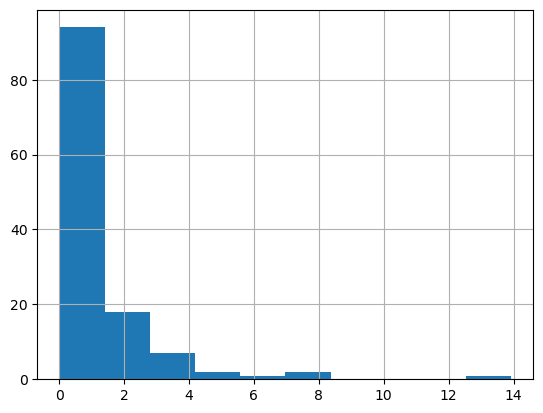

In [3]:
# Stack the data into a single column
data_stack = data.stack()

# Plot a histogram of the data_stack
data_stack.hist()
plt.show()

> The distribution is highly skewed.

> Verify the assumption of normality. 

p-value of the Shapiro-Wilk test: 0.000


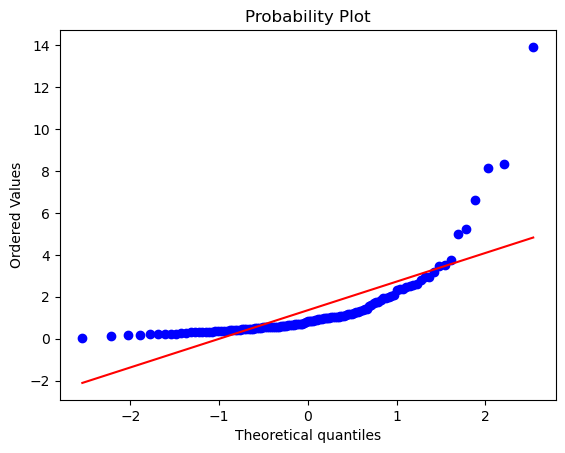

In [4]:
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data_stack)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_stack, dist="norm", plot=plt)
plt.show()

> The data are non-normal. Therefore, we cannot use the X-bar and R chart on the raw data. We need to transform the data.
>
> But what happens if we neglect the normality violation and use the X-bar and R chart on the raw data?

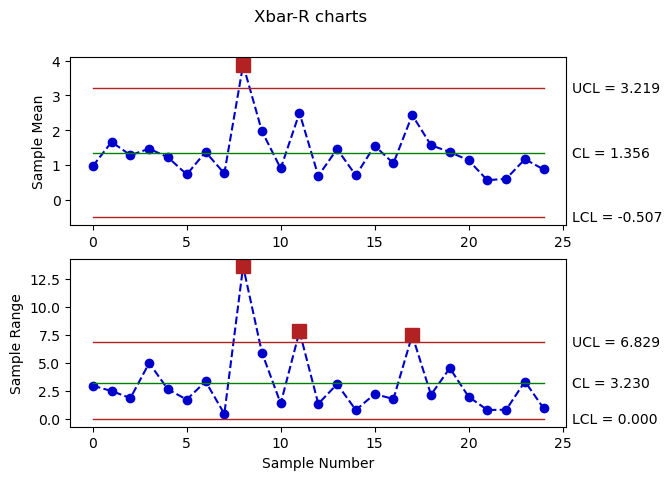

In [5]:
# X-bar and R charts
data_XR = qda.ControlCharts.XbarR(data)

> OOC observations may be due to a violation of control chart assumptions...

> Let's transform the data to make it more normal using the Box-Cox transformation.
>
> Remember the Box-Cox transformation is defined as:
> $$x_{BC,i} = \left\{ \begin{array}{ll} \frac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\ \ln x_i & \text{if } \lambda = 0 \end{array} \right.$$

Lambda = -0.037


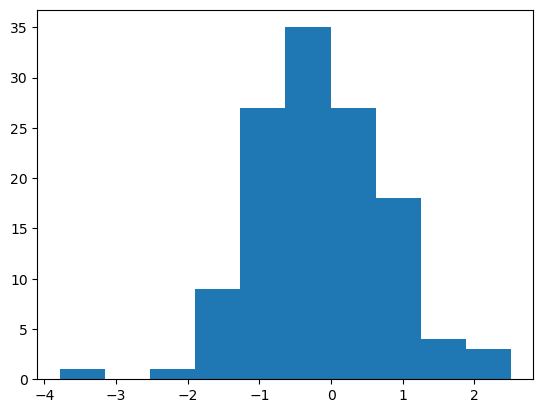

In [6]:
# Box-Cox transformation and return the transformed data
[data_BC, lmbda] = stats.boxcox(data_stack)

print('Lambda = %.3f' % lmbda)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

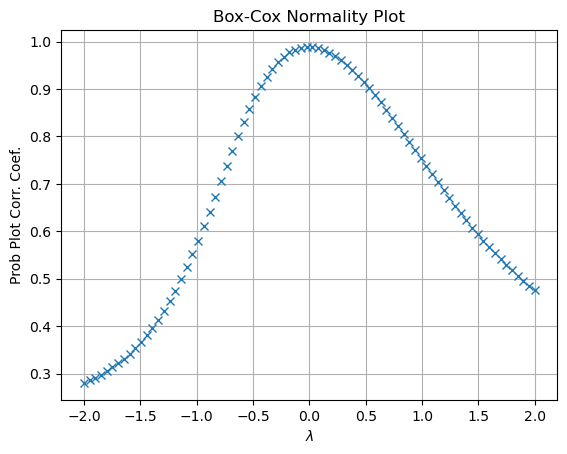

In [7]:
# It is also possible to find the best value of lambda for the transformation
fig = plt.figure()
ax = fig.add_subplot(111)
stats.boxcox_normplot(data_stack, -2, 2, plot=ax)
# add grid
ax.grid(True)

By default, the Box-Cox function used Lambda = -0.037. A more interpretable (and very close to optimum) value is Lambda = 0.

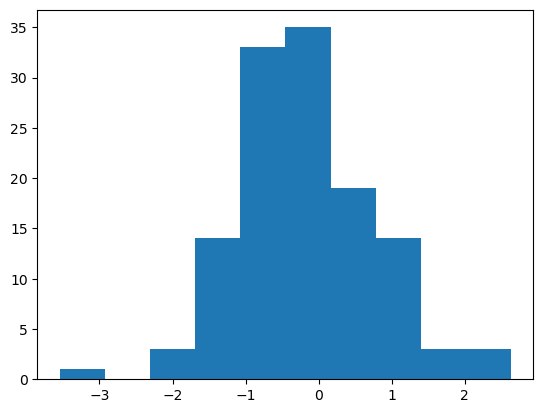

In [8]:
# Use lambda = 0 for Box-Cox transformation and return the transformed data
data_BC = stats.boxcox(data_stack, lmbda=0)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

> Now the data seem to follow a normal distribution. Let's verify this by testing the normality.

p-value of the Shapiro-Wilk test: 0.107


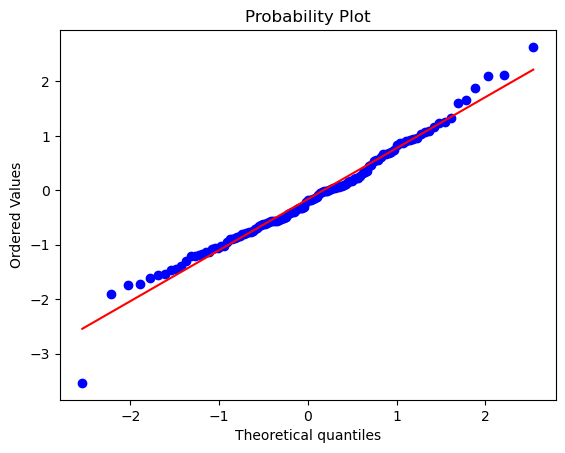

In [9]:
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data_BC)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_BC, dist="norm", plot=plt)
plt.show()

> Normality is verified. We can now use the X-bar and R chart on the transformed data.

In [10]:
# First we need to unstack the data
data_BC_unstack = data_BC.reshape(data.shape)
# and convert it to a DataFrame
data_BC_unstack = pd.DataFrame(data_BC_unstack, columns = data.columns)

# Print out the transformed data
data_BC_unstack.head()

,x1,x2,x3,x4,x5
0,-0.748660,-0.903868,-1.546463,1.159080,-0.558616
1,-0.843970,0.964319,0.347130,-0.088831,1.076026
2,-1.910543,0.661657,0.055435,0.702602,0.227932
3,1.650388,-1.555897,0.045929,-0.709277,-0.946750
4,-1.177655,-0.623621,-0.562119,1.082144,0.554460


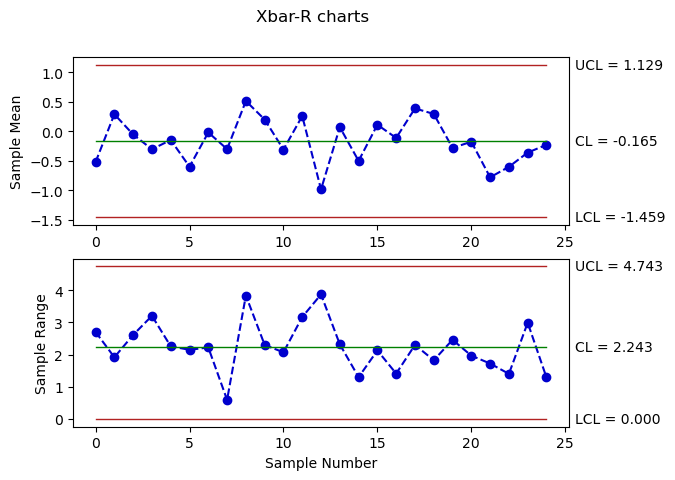

In [11]:
# X-bar and R charts
data_BC_XR = qda.ControlCharts.XbarR(data_BC_unstack)

> The X-bar and R chart show that the process is in control.